# Task 3: Build and Evaluate Models

### Importar librerias

In [118]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns 
import scipy
from math import sqrt
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model 

#model metrics
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#cross validation
from sklearn.model_selection import train_test_split

In [119]:
df = pd.io.parsers.read_csv("/Users/ariasrodriguez/Documents/GitHub/Data_Analytics-Big_Data/default of credit card clients.csv", header =0) 
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [8]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [9]:
variableName = df.iloc[1,1]
variableName

120000

In [33]:
variableName = df['ID']
variableName

0            1
1            2
2            3
3            4
4            5
         ...  
29995    29996
29996    29997
29997    29998
29998    29999
29999    30000
Name: ID, Length: 30000, dtype: int64

### Seleccione las caracteristicas 

In [120]:
#features
features = df.iloc[:,12:23]
print('Summary of feature sample')
features.head()

Summary of feature sample


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,3913,3102,689,0,0,0,0,689,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


### Seleccione la variable dependiente

In [121]:
#dependent variable
depVar = df['PAY_AMT6']
depVar

0           0
1        2000
2        5000
3        1000
4         679
         ... 
29995    1000
29996       0
29997    3100
29998    1804
29999    1000
Name: PAY_AMT6, Length: 30000, dtype: int64

### Conjunto de entrenamiento para las variables X

In [122]:
X_train, X_test = train_test_split(features, test_size=0.30)
X_train_count = len(X_train.index)
X_test_count = len(X_test.index)
print('The number of observations in the X training set are:',str(X_train_count),'and X test are:',str(X_test_count))

The number of observations in the X training set are: 21000 and X test area: 9000


### Conjunto de entrenamiento para las variables Y

In [123]:
#Dependent Variable Training Set (y Training)
y_train, y_test = train_test_split(depVar,test_size=0.30)
y_train_count = len(y_train.index)
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_train_count),'and Y test are:',str(y_test_count))

The number of observations in the Y training set are: 21000 and Y test are: 9000


#### Validación cruzada

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)

In [125]:
X_train.shape, X_test.shape

((15750, 11), (5250, 11))

### Parámetros de ajuste y definición del modelo

In [85]:
model = LinearRegression(n_jobs=10)

### Establezca variables que usará para definir cada modelo

In [126]:
#Models
modelSVR = SVR()
modelRF = RandomForestRegressor()
modelLR = LinearRegression()

### Establecer una variable específicamente para sus funciones

In [13]:
#features
features = df.iloc[:,12:23]
print('Summary of feature sample')
features.head()

Summary of feature sample


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,3913,3102,689,0,0,0,0,689,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


### Validar que se está utilizando la columna correcta para la variable dependiente

In [14]:
#dependent variable
print(depVar)

0           0
1        2000
2        5000
3        1000
4         679
         ... 
29995    1000
29996       0
29997    3100
29998    1804
29999    1000
Name: PAY_AMT6, Length: 30000, dtype: int64


### Utilice las variables de modelo que estableció y transfiérales los datos de entrenamiento

##### Linear Regression

In [87]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=10, normalize=False)

#### Random Forest

In [127]:
modelRF.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

#### Support Vector Regression

In [89]:
modelSVR.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

#### Linear Regression

In [90]:
modelLR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Para cada modelo entrenado y los conjuntos de entrenamiento obtener el puntaje de entrenamiento

#### Random Forest

In [128]:
print(cross_val_score(modelRF, X_train, y_train)) 

[-0.08945129 -0.12621482 -0.0703644  -0.03944214 -0.06026714]


#### Support Vector Regression

In [20]:
print(cross_val_score(modelSVR, X_train, y_train))

[-0.1174029  -0.03618741 -0.01949292 -0.05651539 -0.04424895]


#### Linear Regression

In [92]:
print(cross_val_score(modelLR, X_train, y_train))

[ 0.00089329 -0.00410186  0.00322171 -0.00346046 -0.00060503]


In [93]:
model.score(X_train,y_train)

0.0031966000097938263

In [129]:
modelRF.score(X_train,y_train)

0.8220397858819302

In [95]:
modelSVR.score(X_train,y_train)

-0.04511799260712013

In [96]:
modelLR.score(X_train,y_train)

0.0031966000097938263

#### Ajuste y puntuación del modelo de regresión forestal aleatoria

In [130]:
#Model Fitting
modelRF.fit(X_train,y_train)
print(cross_val_score(modelRF, X_train, y_train))
modelRF.score(X_train,y_train)

[-0.08758237 -0.13886651 -0.06864303 -0.03600789 -0.05552813]


0.822563834106218

#### Soporte de ajuste y puntuación del modelo de regresión vectorial

In [98]:
modelSVR.fit(X_train,y_train)
print(cross_val_score(modelSVR, X_train, y_train)) 
modelSVR.score(X_train,y_train)

[-0.05058631 -0.05006105 -0.05021291 -0.0472213  -0.03398207]


-0.04511799260712013

#### Ajuste y puntuación del modelo de regresión lineal

In [99]:
modelLR.fit(X_train,y_train)
print(cross_val_score(modelLR, X_train, y_train)) 
modelLR.score(X_train,y_train)

[ 0.00089329 -0.00410186  0.00322171 -0.00346046 -0.00060503]


0.0031966000097938263

### Hacer predicciones y evaluar los resultados

#### Haciendo predicciones

In [131]:
predictions = modelRF.predict(X_test)

### Evaluando los resultados

#### Calcular RMSE

In [132]:
rmse = sqrt(mean_squared_error(y_test, predictions))

#### Calcular R Cuadrado 

In [133]:
predRsquared = r2_score(y_test,predictions)

In [134]:
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: -0.062
RMSE: 19815.922


### Trazando los resultados

In [49]:
rng = np.random.RandomState(0)
colors = rng.rand(100)

ValueError: 'c' argument has 2 elements, which is inconsistent with 'x' and 'y' with size 5250.

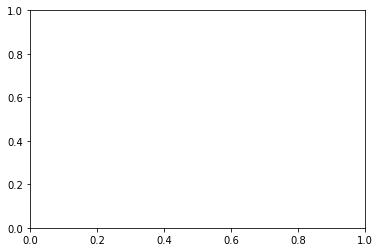

In [137]:
plt.scatter(y_test, predictions, color=['blue','green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();